In [35]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shaki\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Shaki\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Shaki\AppData\Roaming\nltk_data...


In [3]:
data=pd.read_csv("twitter_training.csv")
data.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


# Data Preparation

In [5]:
data.shape  # to see the size of data

(74681, 4)

In [9]:
game_count=data['Borderlands'].value_counts()   #count of unique names per games
print(game_count)

Borderlands
TomClancysRainbowSix                 2400
MaddenNFL                            2400
Microsoft                            2400
LeagueOfLegends                      2394
CallOfDuty                           2394
Verizon                              2382
CallOfDutyBlackopsColdWar            2376
ApexLegends                          2376
Facebook                             2370
WorldOfCraft                         2364
Dota2                                2364
NBA2K                                2352
TomClancysGhostRecon                 2346
Battlefield                          2346
FIFA                                 2340
Xbox(Xseries)                        2334
Overwatch                            2334
johnson&johnson                      2328
Amazon                               2316
PlayStation5(PS5)                    2310
HomeDepot                            2310
Cyberpunk2077                        2304
CS-GO                                2304
GrandTheftAuto(GTA)   

In [10]:
sentiment_count=data['Positive'].value_counts()  #count of sentiments
print(sentiment_count)

Positive
Negative      22542
Positive      20831
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64


In [11]:
data.describe(include='all')

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
count,74681.000000,74681,74681,73995
unique,NaN,32,4,69490
top,NaN,TomClancysRainbowSix,Negative,
freq,NaN,2400,22542,172
mean,6432.640149,NaN,NaN,NaN
std,3740.423819,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN
25%,3195.000000,NaN,NaN,NaN
50%,6422.000000,NaN,NaN,NaN
75%,9601.000000,NaN,NaN,NaN


In [13]:
#Renamimg the column
data.columns=['EntryID','Application','Sentiment','Comment']
data.head()

,EntryID,Application,Sentiment,Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [14]:
data=data.drop_duplicates(subset='EntryID')
data=data.dropna()    # remove rows with missing values

In [15]:
# Check for missing values again to confirm
missing_values = data.isna().sum()
print("Missing values after removal:\n", missing_values)

Missing values after removal:
 EntryID        0
Application    0
Sentiment      0
Comment        0
dtype: int64


In [16]:
data=data[~data['Sentiment'].isin(['Irrelevant'])]  # removing irrelevant from data

# Data Anlysis 

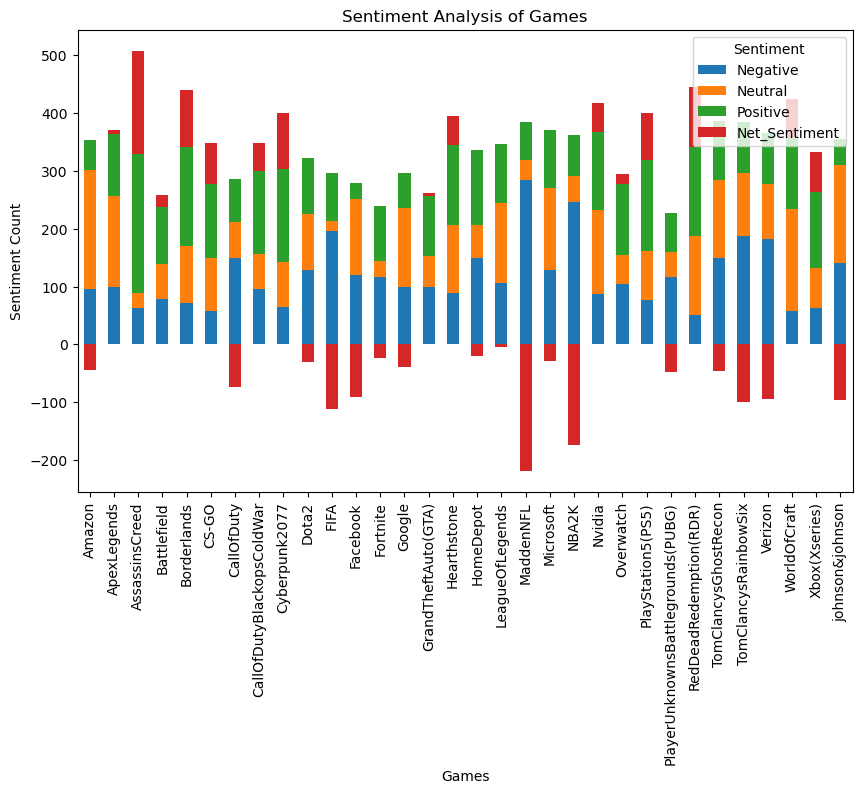

The most positively viewed game: AssassinsCreed
The most negatively viewed game: MaddenNFL


In [19]:
sentiment_count=data.groupby(['Application','Sentiment']).size().unstack().fillna(0)
sentiment_count['Net_Sentiment'] = sentiment_count['Positive'] - sentiment_count['Negative']

# Sorting by net sentiment to find the most positive and negative games
most_positive_game = sentiment_count['Net_Sentiment'].idxmax()
most_negative_game = sentiment_count['Net_Sentiment'].idxmin()

# Visualizing the sentiment counts
sentiment_count.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sentiment Analysis of Games')
plt.xlabel('Games')
plt.ylabel('Sentiment Count')
plt.legend(title='Sentiment', loc='upper right')
plt.show()

print(f"The most positively viewed game: {most_positive_game}")
print(f"The most negatively viewed game: {most_negative_game}")


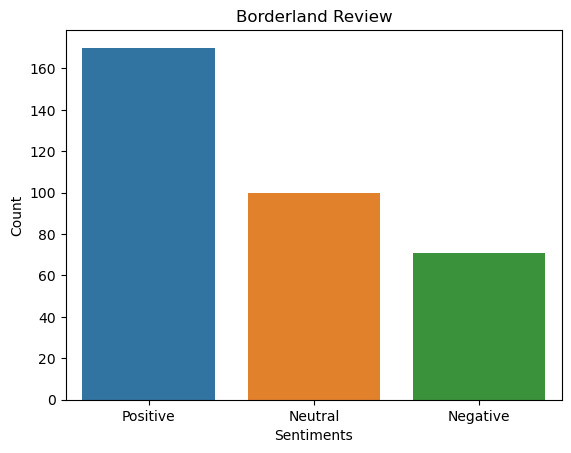

In [20]:
# to find borderlands has how many comments and which type of
Borderland_sentiment=data[data['Application']=='Borderlands']['Sentiment'].value_counts()
sns.barplot(x=Borderland_sentiment.index,y=Borderland_sentiment)
plt.title('Borderland Review')
plt.xlabel('Sentiments')
plt.ylabel('Count')
plt.show()

In [22]:
from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
game_name_encoder = LabelEncoder()
# Fit and transform the GameName column
data['GameName_Encoded'] = game_name_encoder.fit_transform(data['Application'])
# Get the mapping of game names to encoded numbers
game_name_mapping = dict(zip(game_name_encoder.classes_, game_name_encoder.transform(game_name_encoder.classes_)))
print("Game Name to Number Mapping:")
print(game_name_mapping)

data.head()

Game Name to Number Mapping:
{'Amazon': 0, 'ApexLegends': 1, 'AssassinsCreed': 2, 'Battlefield': 3, 'Borderlands': 4, 'CS-GO': 5, 'CallOfDuty': 6, 'CallOfDutyBlackopsColdWar': 7, 'Cyberpunk2077': 8, 'Dota2': 9, 'FIFA': 10, 'Facebook': 11, 'Fortnite': 12, 'Google': 13, 'GrandTheftAuto(GTA)': 14, 'Hearthstone': 15, 'HomeDepot': 16, 'LeagueOfLegends': 17, 'MaddenNFL': 18, 'Microsoft': 19, 'NBA2K': 20, 'Nvidia': 21, 'Overwatch': 22, 'PlayStation5(PS5)': 23, 'PlayerUnknownsBattlegrounds(PUBG)': 24, 'RedDeadRedemption(RDR)': 25, 'TomClancysGhostRecon': 26, 'TomClancysRainbowSix': 27, 'Verizon': 28, 'WorldOfCraft': 29, 'Xbox(Xseries)': 30, 'johnson&johnson': 31}


,EntryID,Application,Sentiment,Comment,GameName_Encoded
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,4
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,4
11,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",4
17,2404,Borderlands,Positive,that was the first borderlands session in a lo...,4
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...,4


In [24]:
# Initialize another label encoder for Sentiment
sentiment_encoder = LabelEncoder()
# Fit and transform the Sentiment column
data['Sentiment_Encoded'] = sentiment_encoder.fit_transform(data['Sentiment'])
# Get the mapping of sentiment labels to encoded numbers
label_mapping = dict(zip(sentiment_encoder.classes_, sentiment_encoder.transform(sentiment_encoder.classes_)))
print("Sentiment to Number Mapping:")
print(label_mapping)

data.head()

Sentiment to Number Mapping:
{'Negative': 0, 'Neutral': 1, 'Positive': 2}


,EntryID,Application,Sentiment,Comment,GameName_Encoded,Sentiment_Encoded
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,4,2
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,4,2
11,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",4,1
17,2404,Borderlands,Positive,that was the first borderlands session in a lo...,4,2
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...,4,0


# Pre Processing

In [38]:

# Function for text cleaning and tokenization
def clean_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove special characters, punctuation, and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Tokenize text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Lemmatization(Reduce words to their base form for consistency)
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return tokens

# Apply text cleaning and tokenization to the 'Comment' column
data['Cleaned_Comment'] = data['Comment'].apply(clean_text)

# Display the cleaned and tokenized data
print(data[['Comment', 'Cleaned_Comment']])
data.head()

                                                 Comment  \
0      I am coming to the borders and I will kill you...   
5      So I spent a few hours making something for fu...   
11     Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...   
17     that was the first borderlands session in a lo...   
23     the biggest dissappoinment in my life came out...   
...                                                  ...   
74651  Cheap doesn't mean better btw! . . techsall.co...   
74657  Nvidia doesn’t want to give up its 2017 ‘crypt...   
74663          Nvidia really delayed the 3070 2 weeks .    
74669  Let no elim go unnoticed. . . . NVIDIA Highlig...   
74675  Just realized the windows partition of my Mac ...   

                                         Cleaned_Comment  
0                                 [coming, border, kill]  
5      [spent, hour, making, something, fun, dont, kn...  
11     [rockhard, la, varlope, rare, powerful, handso...  
17     [first, borderland, session, long, t

,EntryID,Application,Sentiment,Comment,GameName_Encoded,Sentiment_Encoded,Cleaned_Comment
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,4,2,"[coming, border, kill]"
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...,4,2,"[spent, hour, making, something, fun, dont, kn..."
11,2403,Borderlands,Neutral,"Rock-Hard La Varlope, RARE & POWERFUL, HANDSOM...",4,1,"[rockhard, la, varlope, rare, powerful, handso..."
17,2404,Borderlands,Positive,that was the first borderlands session in a lo...,4,2,"[first, borderland, session, long, time, actua..."
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...,4,0,"[biggest, dissappoinment, life, came, year, ag..."


# Sentimental Analysis

In [42]:
#!pip install wordcloud

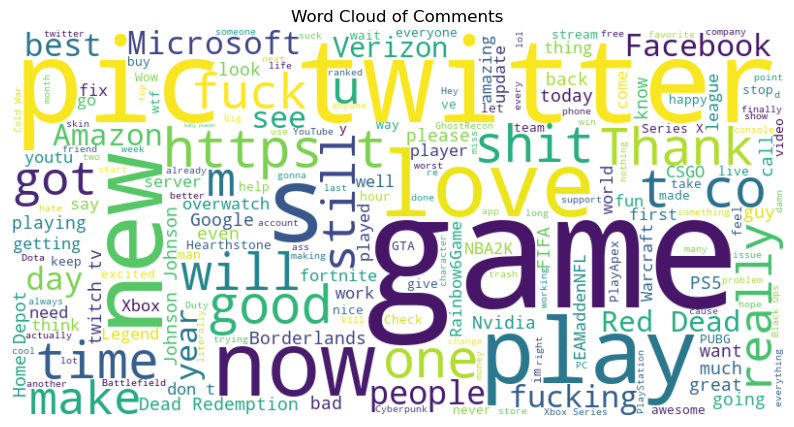

In [41]:
from wordcloud import WordCloud #Display frequently used words to visualize prevailing sentiments.

comments = data['Comment'].values.tolist()

# Join all comments into a single string
all_comments = ' '.join(comment for comment in comments)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

# Display the word cloud using Matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Comments')
plt.show()

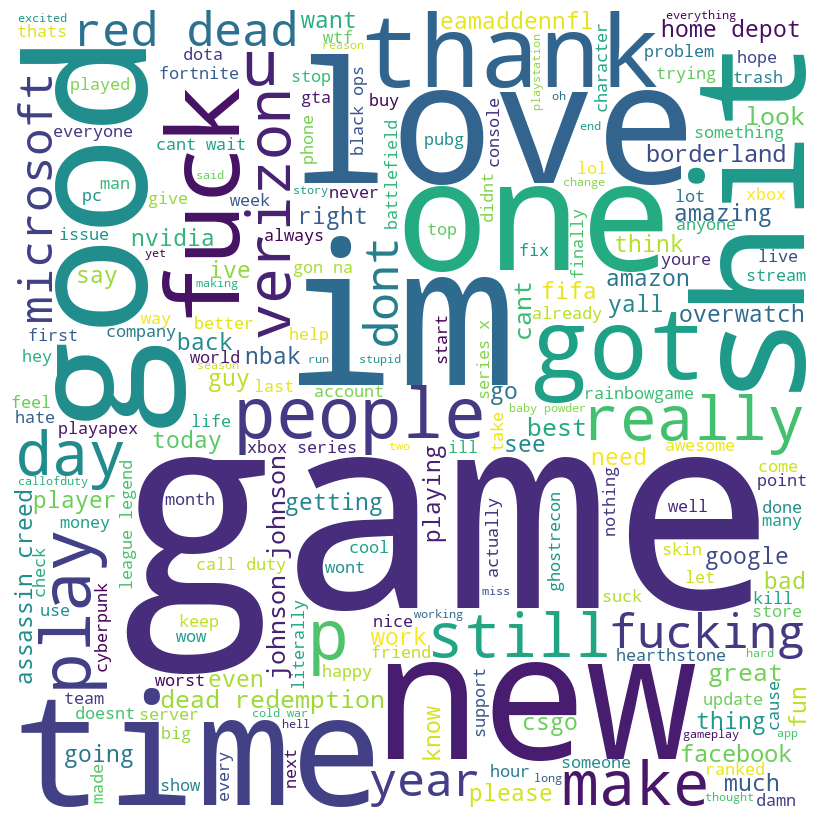

In [43]:
from collections import Counter
import itertools

# Assuming 'Processed_Text' is a list of words for each row
all_words = list(itertools.chain(*data['Cleaned_Comment']))
word_counts = Counter(all_words)

# Filter out words that appear only once
repeating_words = {word: count for word, count in word_counts.items() if count > 1}
# Assuming 'all_words' is a list of all words in your processed text
wordcloud = WordCloud(width = 800, height = 800,
                      background_color ='white',
                      min_font_size = 10).generate(' '.join(all_words))

# Plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

Sentiment
Negative    3757
Positive    3472
Neutral     3053
Name: count, dtype: int64


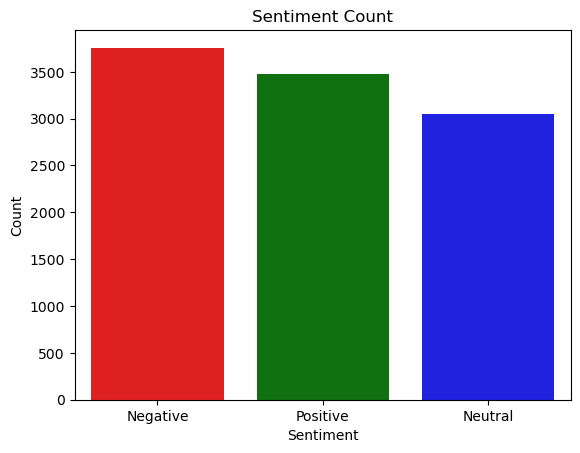

In [44]:
sentiment_count=data['Sentiment'].value_counts()  #count of sentiments (excluding irrelevent)
print(sentiment_count)

colors=['red','green','blue']

sns.barplot(x=sentiment_count.index,y=sentiment_count.values,palette=colors)
plt.title('Sentiment Count')
plt.ylabel('Count')
plt.xlabel('Sentiment')
plt.show()



In [45]:
# Support Vector Machine (SVM) for sentiment analysis.
''' the usage of SVMs in this context might not be for predicting sentiments (as the labels are already present) but rather to assess how well an SVM model can learn and replicate the sentiments provided in the dataset based on the textual information available.'''

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Replace 'Sentiment' with numerical values (0 for negative, 1 for neutral, 2 for positive)
#i.e column of sentimental_encoded

# Splitting data into train and test sets
X_train,X_test,y_train,y_test=train_test_split(data['Comment'],data['Sentiment'],test_size=0.2, random_state=42)

# Initialize TF-IDF Vectorizer
'''used in the context of text-based machine learning tasks, specifically for sentiment analysis or any natural language processing (NLP) task.'''
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # You can adjust max_features as needed
#Converting the text data into numerical form using TF-IDF Vectorization

# Fit and transform the training data
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# Initialize and train the Support Vector Machine (SVM) model
#Creating SVM model
svm_model = SVC(kernel='linear')  # You can explore different kernels: 'linear', 'rbf', 'poly', etc.
svm_model.fit(X_train_tfidf, y_train)
#Using the trained SVM model to predict sentiment labels for the test set based on the text data.
# Predicting on the test set
y_pred = svm_model.predict(X_test_tfidf)
# Calculating the accuracy of the model by comparing predicted labels with the actual labels in the test set.
# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
#Providing a detailed report including precision, recall, F1-score, and support for each class (positive, negative, neutral)
# Print classification report
print(classification_report(y_test, y_pred))

Accuracy: 0.6543509965969859
              precision    recall  f1-score   support

    Negative       0.65      0.78      0.71       743
     Neutral       0.64      0.49      0.56       617
    Positive       0.66      0.67      0.67       697

    accuracy                           0.65      2057
   macro avg       0.65      0.65      0.64      2057
weighted avg       0.65      0.65      0.65      2057



precision -Indicates the accuracy of the positive and negative predictions                             
recall-It shows the proportion of correctly predicted instances compared to all actual instances of that sentiment             
f1-score -The harmonic mean of precision and recall. It gives a balanced measure between precision and recall.                
support-The number of actual occurrences of each class in the test dataset


Dataset shape:  (10282, 9)


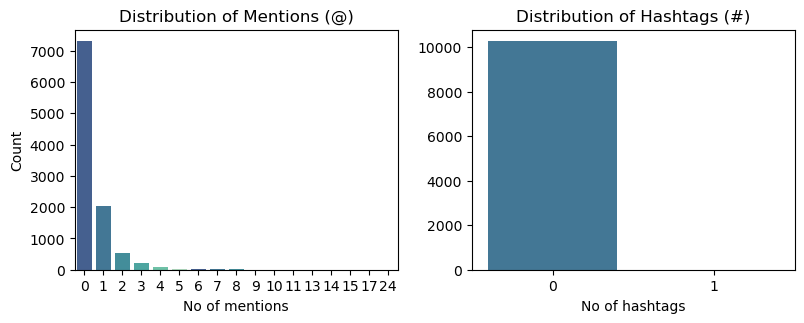

<Figure size 600x300 with 0 Axes>

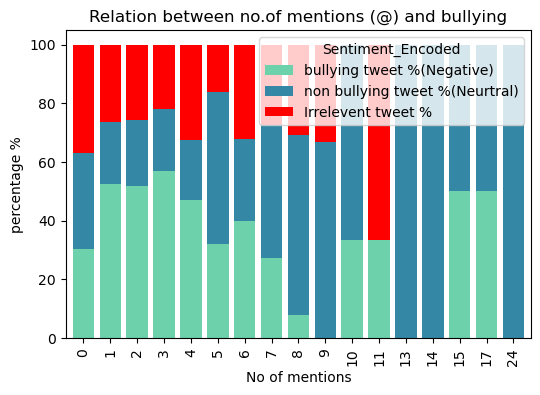

In [49]:
# Sentiment Analysis using @ and #
# here we create a function to count the number of hashtags and mentions and then create two columns to store this data
def count_symbols(text):
    hashtag_count = len(re.findall(r'#', text))
    mention_count = len(re.findall(r'@', text))
    return hashtag_count, mention_count

# Apply the function to each row in the 'text' column
data[['num_hashtags', 'num_mentions']] = data['Comment'].apply(lambda x: pd.Series(count_symbols(x)))

print('\nDataset shape: ', data.shape)
data.head()

plt.figure(figsize=(9, 3))
plt.subplot(1, 2, 1)
sns.countplot(x='num_mentions', data=data, palette =  sns.color_palette("mako", n_colors=9)[3:])
plt.xlabel('No of mentions')
plt.ylabel('Count')
plt.title('Distribution of Mentions (@)')


plt.subplot(1, 2, 2)
sns.countplot(x='num_hashtags', data=data, palette = sns.color_palette("mako", n_colors=11)[5:])
plt.xlabel('No of hashtags')
plt.ylabel('')
plt.title('Distribution of Hashtags (#)')


plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9, wspace=0.23, hspace=0.3)
plt.show()

plt.figure(figsize=(6, 3))
mention_label_cross = pd.crosstab(data['num_mentions'], data['Sentiment_Encoded'])
mention_label_cross['sum'] = mention_label_cross[0.0] + mention_label_cross[1.0]+ mention_label_cross[2.0]
mention_label_cross['bullying tweet %(Negative)'] = mention_label_cross[0.0]/mention_label_cross['sum']*100
mention_label_cross['non bullying tweet %(Neurtral)'] = mention_label_cross[1.0]/mention_label_cross['sum']*100
mention_label_cross['Irrelevent tweet %'] = mention_label_cross[2.0]/mention_label_cross['sum']*100
mention_label_cross = mention_label_cross.drop([0.0, 1.0, 2.0, 'sum'], axis=1)

mention_label_cross.plot(kind='bar', stacked=True, figsize=(6, 4), color=['#6dd2ac', '#3487a5','Red'], width=0.8)
plt.xlabel('No of mentions')
plt.ylabel('percentage %')
plt.title('Relation between no.of mentions (@) and bullying')
plt.show()
